## Using K-Means and KNN

### let us create a dataset using make_circles and classify them using K-Means(cluster) and KNN 

In [1]:
from sklearn.datasets import make_circles

In [2]:
features, _ = make_circles(n_samples=1000,noise=0.1,random_state=42,factor=0.1)

In [3]:
features[:3]

array([[ 0.0363413 ,  0.10210926],
       [ 0.01196432,  0.09342753],
       [-0.17154538,  0.25591813]])

In [4]:
# Let us plot this points on a graph and see how they look
import seaborn as sns
import numpy as np
import pandas as pd

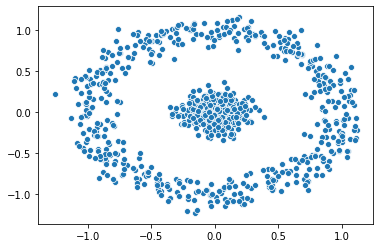

In [5]:
sns.scatterplot(x=features[:,0],y=features[:,1])

### Thus we have two circles one Inner and one Outer and can be clearly differentiated

### Let us try to cluster them in 2 clusters one for outer and one for inner using K-Means

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmean = KMeans(n_clusters=2)

In [8]:
kmean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
#Let us predict them in groups 
predict_kmean = kmean.fit_predict(features)

### Let us plot the points again with respect to there cluster classification and see how it looks

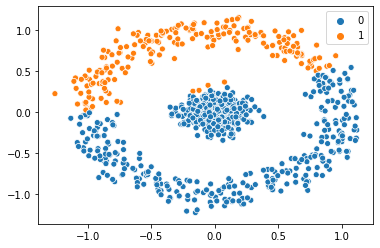

In [10]:
sns.scatterplot(features[:,0],features[:,1],hue=predict_kmean)

### Thus the points have been divided into two parts but they are not divided into inner and outer circles.
### We can tune the KMean but more or less the results will be similar i.e. they will be divided in similar fashion.
### So let us try to reduce the features , merge them into one feature and try K-Means

In [11]:
from sklearn.decomposition import KernelPCA

In [12]:
kpca = KernelPCA(n_components=1,kernel='rbf',gamma=15)

In [13]:
features_kpca = kpca.fit_transform(features)

In [14]:
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


In [15]:
features_kpca[:3]

array([[0.50888811],
       [0.53692465],
       [0.00201522]])

In [16]:
features[:3]

array([[ 0.0363413 ,  0.10210926],
       [ 0.01196432,  0.09342753],
       [-0.17154538,  0.25591813]])

In [17]:
features_kpca.max()

0.6246808461873271

In [18]:
features_kpca.min()

-0.3928527861331473

### Now let us try K-Means on the reduced dataset features_kpca.

In [19]:
predict_kpca = kmean.fit_predict(features_kpca)

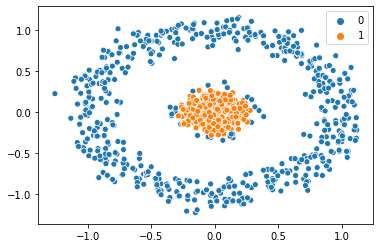

In [20]:
sns.scatterplot(features[:,0],features[:,1],hue=predict_kpca)

### Looks much better

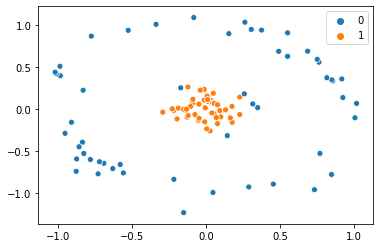

In [21]:
# let us check the first 100 points 
sns.scatterplot(features[:100,0],features[:100,1],hue=predict_kpca[:100])

### KNN
The first 100 points of the total 1000 points seems to include data from both the categories in a fair proportion.
Let us use these 100 points to train a KNN algorithmn and then predict for the rest 900 or all.
KNN is a supervised learning method and is used mainly for classification purposes.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=10)

In [24]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [25]:
knn.fit(features[0:100],predict_kpca[0:100])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [26]:
predict_knn = knn.predict(features)

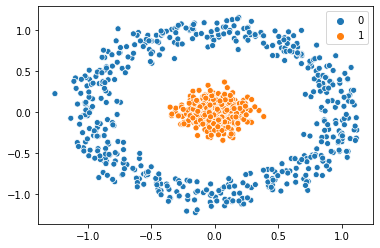

In [27]:
sns.scatterplot(x=features[:,0],y=features[:,1],hue = predict_knn)

In [28]:
# Looks much better , thus we have trained and predicted a KNN model, 
# using the first 100 predictions of an unsupervised learning model K-Means